In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Initialization and Declaration
xtest = .2
x = [.06, .07, .08, .09, .10, .11, .12, .13, .14, .15] # Independent Variable
y = [8.33, 7.14, 6.25, 5.56, 5.00, 4.55, 4.17, 3.85, 3.57, 3.33] # Dependent Variable
a = b = c = d = avg_x = avg_y = delta_y = error_i = mse = rmse = 0
n = len(x)

In [2]:
# Calculation
# Average
for i in range(n):
    avg_x += np.log(x[i])
    avg_y += np.log(y[i])
avg_x /= n
avg_y /= n

# Power and Coefficient
for i in range(n):
    a += np.log(x[i]) * (np.log(y[i]) - avg_y)
    b += np.log(x[i]) * (np.log(x[i]) - avg_x)
m = a / b # Slope (Power)
c = np.exp(avg_y - (m * avg_x)) # Constant (Coefficient)
print(f'y = f(x) = {c}x ^ {m}')

# Error
for i in range(n):
    delta_y += (np.log(y[i]) - avg_y) ** 2
    error_i += (np.log(y[i]) - (avg_y - (m * avg_x)) - (m * np.log(x[i]))) ** 2
r_squared = (delta_y - error_i) / delta_y
r = r_squared ** .5
for i in range(n):
    mse += ((0.5004 * x[i] ** (-0.9997)) - y[i]) ** 2
mse = mse / n
rmse = mse ** 0.5
ytest = c * xtest ** m

print(avg_x)
print(avg_y)
print(r_squared)
print(r)
print(mse)
print(ytest)

y = f(x) = 0.5003629872770552x ^ -0.9997445723243986
-2.293992221882206
1.600984803383231
0.9999946116945303
0.9999973058436359
8.724378220260378e-06
2.500786664184789


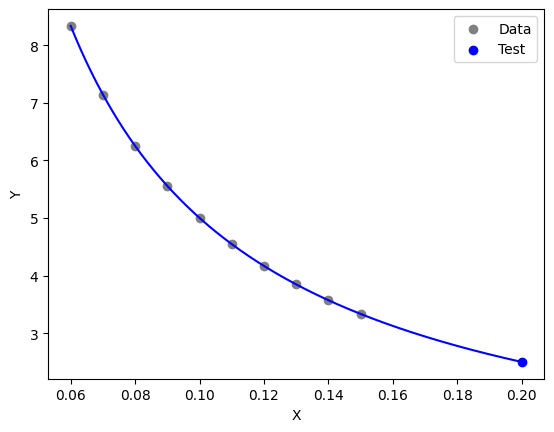

In [3]:
# Visualization
plt.scatter(x, y, color = "gray", label = "Data" )
plt.scatter(xtest, ytest, color = "blue", label = "Test" )
if xtest < min(x):
    x = np.linspace(xtest, max(x), 1000)
elif xtest > max(x):
    x = np.linspace(min(x), xtest, 1000)
else:
    x = np.linspace(min(x), max(x), 1000)
y = lambda x: c * x ** (m)
plt.plot(x, y(x), color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = "best")
plt.show()